In [70]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from bg_atlasapi import BrainGlobeAtlas

root = Path("/home/ben/python/brm2/data/deepslice/")
atlas = BrainGlobeAtlas("allen_mouse_25um")

In [76]:
atlas.shape

(528, 320, 456)

In [110]:
# Load the CSV file
df = pd.read_csv(root / "Operator_Alignments/Expert_1/CAMKII.csv")
df.describe()

,Unnamed: 0,ox,oy,oz,ux,uy,uz,vx,vy,vz
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,23.000000,396.787382,215.819701,283.653169,-328.415486,11.314223,5.141962,-3.882608,9.401853,-263.175400
std,13.711309,33.796438,138.381710,27.463380,71.169408,2.581049,10.995997,8.988068,1.577078,46.176140
min,0.000000,301.834153,-47.881279,197.719955,-416.488178,4.709033,-36.580973,-22.412381,3.443334,-330.060650
25%,11.500000,370.708799,95.404158,272.515684,-385.764926,9.364469,1.883380,-8.455352,8.882011,-289.931786
50%,23.000000,407.412668,220.925239,289.117599,-343.973662,11.424901,5.915351,-4.241854,9.623979,-269.975247
75%,34.500000,418.298294,334.343255,302.106055,-273.276914,13.534862,10.942278,-1.124005,10.428551,-250.220874
max,46.000000,441.692851,447.777546,326.747636,-137.185285,15.006827,28.398919,30.012496,11.566738,-95.811161


In [111]:
o = df[["ox", "oy", "oz"]].values
u = df[["ux", "uy", "uz"]].values
v = df[["vx", "vy", "vz"]].values

center = np.array([0.5, 0.5, 1])
matrix = np.stack([u, v, o], axis=1)
atlas_center_coords = center @ matrix
df["ap_value"] = 527-atlas_center_coords[:, 1]

df["ap_value"].describe()

count     47.000000
mean     300.822261
std      138.639770
min       72.075034
25%      181.658345
50%      293.136768
75%      421.564498
max      570.805096
Name: ap_value, dtype: float64

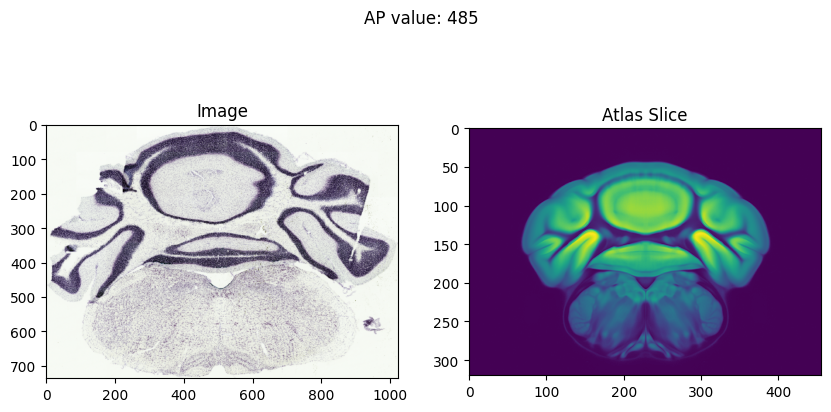

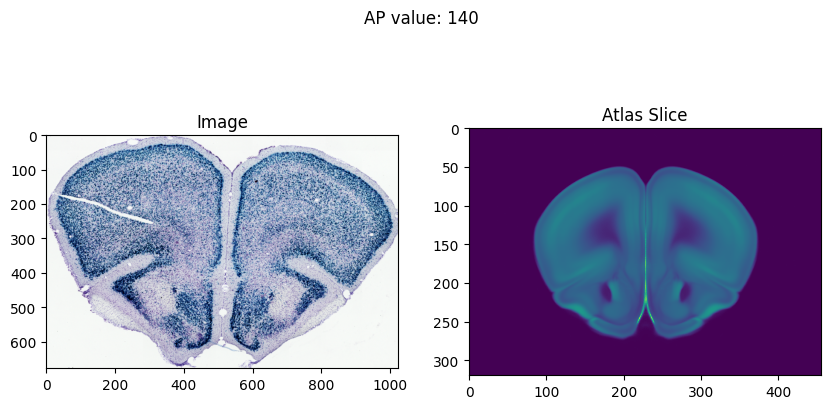

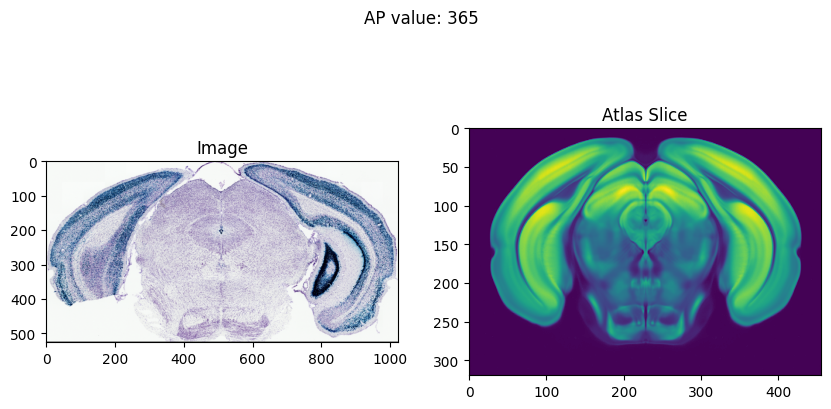

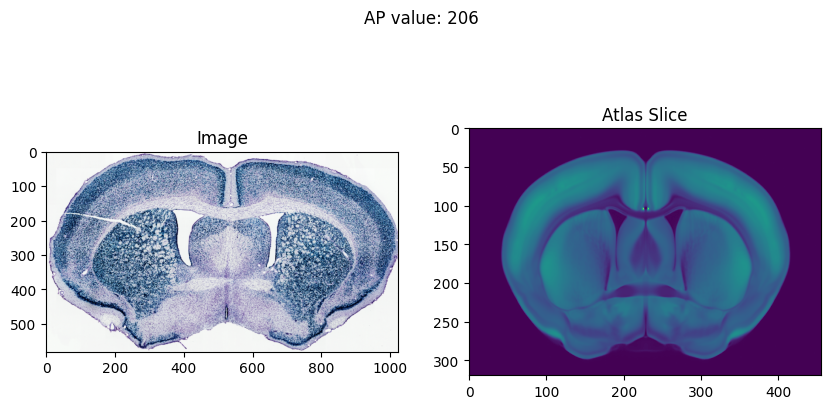

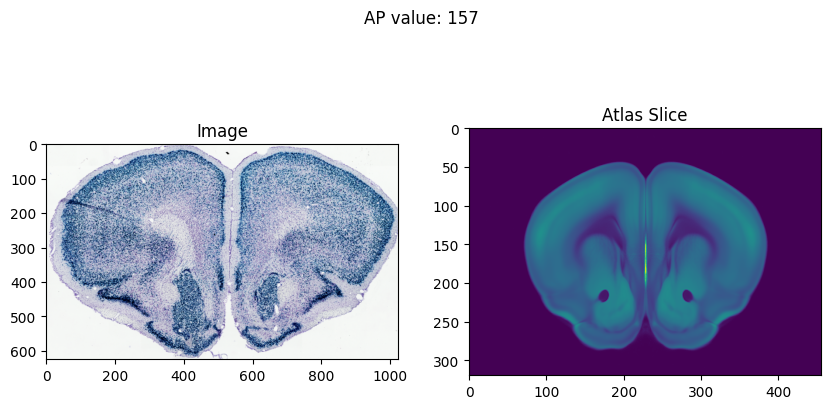

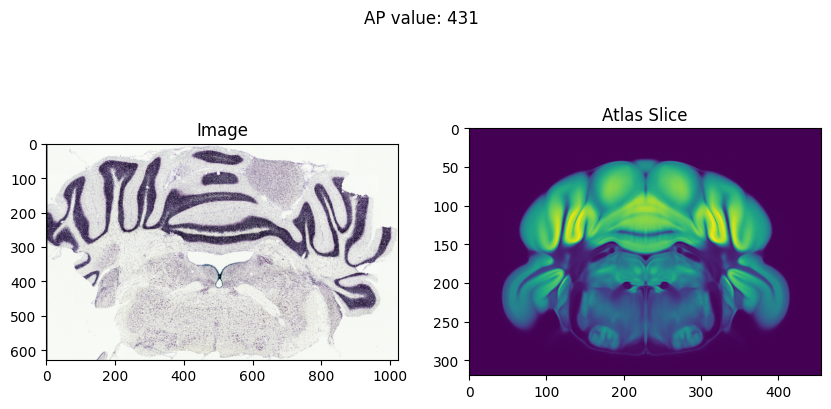

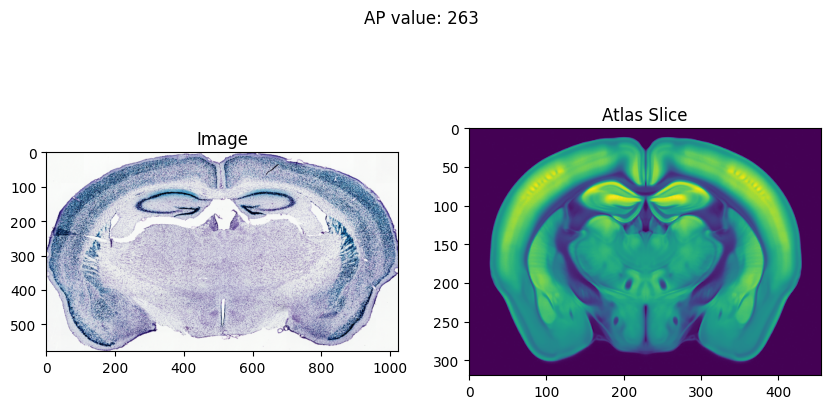

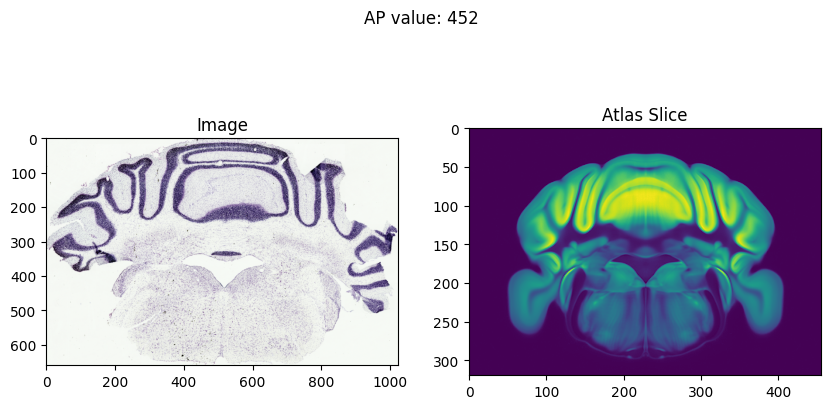

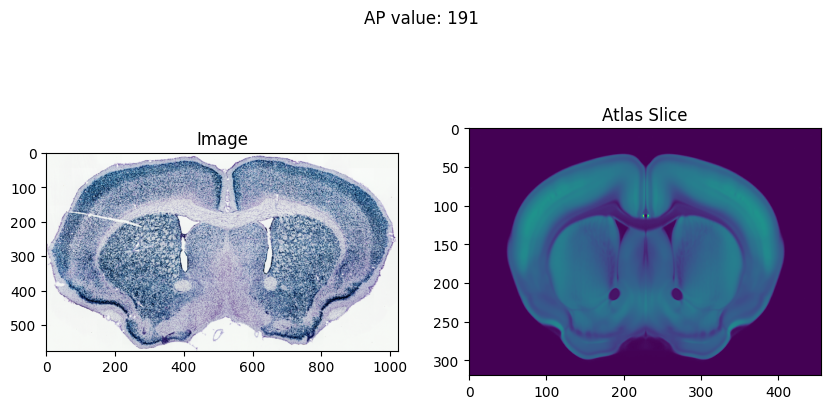

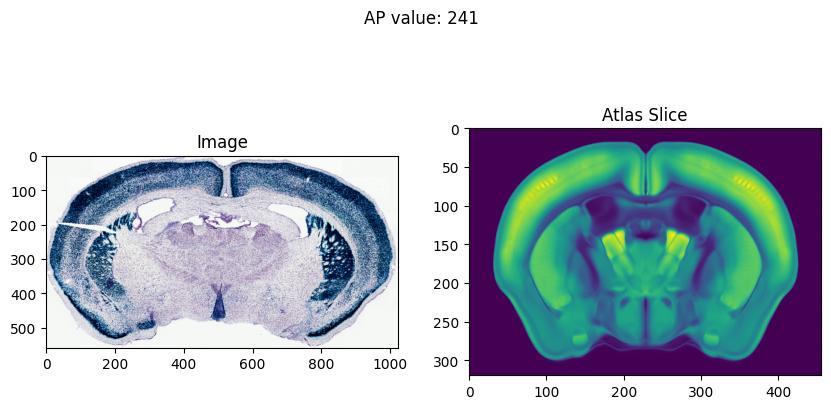

In [112]:
import random


for i in random.sample(range(len(df)), 10):
# for i in range(10):
    image_path = root / df.loc[i, "Filenames"]
    image = Image.open(image_path)
    ap_value = int(df.loc[i, "ap_value"])
    ap_value = np.clip(ap_value, 0, 527)
    atlas_slice = atlas.reference[ap_value]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display image
    axs[0].imshow(image)
    axs[0].set_title("Image")

    # Display atlas slice
    axs[1].imshow(atlas_slice)
    axs[1].set_title("Atlas Slice")

    # Show AP value in title
    plt.suptitle(f"AP value: {ap_value}")

    plt.show()